In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pygeocoder import Geocoder
import numpy as np
from cycler import cycler
import re

import glob

%matplotlib inline

In [3]:
#Import style
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Futura Std',
    'font.style' : 'normal',
    'font.weight' : '100',
    'font.stretch' : 'ultra-condensed',
    
    'figure.facecolor'    : '#FDF6E3',

    
    'patch.antialiased'   : True,

    'lines.linewidth'     : 2.0,
    'lines.solid_capstyle': 'butt',

    'axes.titlesize'      : 16,
    'axes.labelsize'      : 12,
    'axes.labelcolor'     : '#657b83',
    'axes.facecolor'      : '#eee8d5',
    'axes.edgecolor'      : '#eee8d5',
    'axes.axisbelow'      : True,
    'axes.prop_cycle'    : cycler('color', ['#268BD2','#d26c3d', '#dbd7ad', '#f6c5af', '#d7da00', '#7db49f', '#86a3ba']),

    'axes.grid'           : False,
    'grid.color'          : '#ffffff',    # grid color
    'grid.linestyle'      : ':',         # line
    'grid.linewidth'      : 1,        # in points

    ### TICKS
    'xtick.color'         : '#657b83',
    'xtick.direction'     : 'out',
    'xtick.labelsize' : 14,
    'ytick.labelsize' : 14,

    'ytick.color'         : '#657b83',
    'ytick.direction'     : 'out',
    
})

In [4]:
#Read CSV
df=pd.read_csv('Multiple Cause of Death, 1999-2016.txt', delimiter='\t')

In [5]:
#Rename coloumns to be better
df.rename(columns={'County': 'county', 'Year': 'year', 'Deaths': 'deaths', 'Population': 'population', 'Crude Rate': 'deathsper100k'}, inplace=True)

#Drop useless columns
df.drop(['Notes', 'Year Code', 'County Code', '% of Total Deaths'], axis=1, inplace=True)

#Replace missing data with nan
df.replace(['Suppressed', 'Missing', 'Unreliable'], np.nan, inplace=True)

#drop nan's
df.dropna(inplace=True)

#extract state names from county column, save to new column, states
df['state'] = df.county.str.extract(', (\w\w)')

#Convert objects to numbers
df['deaths'] = pd.to_numeric(df['deaths'])
df['population'] = pd.to_numeric(df['population'])
df['deathsper100k'] = pd.to_numeric(df['deathsper100k'])
# df['year'] = pd.to_datetime(df['year'], format='%Y')

In [6]:
df.dtypes

county            object
year               int64
deaths             int64
population         int64
deathsper100k    float64
state             object
dtype: object

In [7]:
df.head()

,county,year,deaths,population,deathsper100k,state
11,"Baldwin County, AL",2006,22,168121,13.1,AL
12,"Baldwin County, AL",2007,29,172404,16.8,AL
13,"Baldwin County, AL",2008,27,175827,15.4,AL
14,"Baldwin County, AL",2009,32,179406,17.8,AL
15,"Baldwin County, AL",2010,26,182265,14.3,AL


In [8]:
df[['state','year','deaths','population','deathsper100k']].sort_values(by='deathsper100k', ascending=False).head(20)

,state,year,deaths,population,deathsper100k
33229,WV,2015,28,19835,141.2
11494,KY,2016,26,18646,139.4
33566,WV,2011,31,23419,132.4
33225,WV,2011,26,21729,119.7
11236,KY,2011,25,21720,115.1
33565,WV,2010,27,23796,113.5
32994,WV,2011,27,24444,110.5
33224,WV,2010,24,22113,108.5
33570,WV,2015,24,22151,108.3
33032,WV,2016,102,95987,106.3


In [9]:
df.sort_values(by='deaths', ascending=False).head(20)

,county,year,deaths,population,deathsper100k,state
6753,"Cook County, IL",2016,1130,5203499,21.7,IL
1176,"Maricopa County, AZ",2016,882,4242997,20.8,AZ
2287,"Los Angeles County, CA",2016,870,10137915,8.6,CA
2284,"Los Angeles County, CA",2013,846,10017068,8.4,CA
2277,"Los Angeles County, CA",2006,827,9737955,8.5,CA
2280,"Los Angeles County, CA",2009,790,9787400,8.1,CA
2278,"Los Angeles County, CA",2007,784,9700359,8.1,CA
6743,"Cook County, IL",2006,777,5165495,15.0,IL
1173,"Maricopa County, AZ",2013,770,4009412,19.2,AZ
1175,"Maricopa County, AZ",2015,764,4167947,18.3,AZ


In [10]:
df.deaths.sum()

383581

In [11]:
df_pa = df[df['state'] == 'PA']
df_pa = df_pa.groupby(['state', 'year']).sum().reset_index()
df_pa['popper100k'] = df_pa['population']/100000
df_pa['deathsper100k'] = df_pa['deaths']/df_pa['popper100k']


df_wv = df[df['state'] == 'WV']
df_wv = df_wv.groupby(['state', 'year']).sum().reset_index()
df_wv['popper100k'] = df_wv['population']/100000
df_wv['deathsper100k'] = df_wv['deaths']/df_wv['popper100k']

df_ne = df[df['state'] == 'NE']
df_ne = df_ne.groupby(['state', 'year']).sum().reset_index()
df_ne['popper100k'] = df_ne['population']/100000
df_ne['deathsper100k'] = df_ne['deaths']/df_ne['popper100k']

# df_wy = df[df['state'] == 'WY']
# df_wy = df_wy.groupby(['state', 'year']).sum().reset_index()
# df_wy['popper100k'] = df_wy['population']/100000
# df_wy['deathsper100k'] = df_wy['deaths']/df_wy['popper100k']

df_ms = df[df['state'] == 'MS']
df_ms = df_ms.groupby(['state', 'year']).sum().reset_index()
df_ms['popper100k'] = df_ms['population']/100000
df_ms['deathsper100k'] = df_ms['deaths']/df_ms['popper100k']

df_state = df.groupby(['state', 'year']).sum().reset_index()
df_state['popper100k'] = df_state['population']/100000
df_state['deathsper100k'] = df_state['deaths']/df_state['popper100k']

df_oh = df[df['state'] == 'OH']
df_oh = df_oh.groupby(['state', 'year']).sum().reset_index()
df_oh['popper100k'] = df_oh['population']/100000
df_oh['deathsper100k'] = df_oh['deaths']/df_oh['popper100k']

In [40]:
death = df.groupby('year').deaths.sum()
uspop = df.groupby('year').population.sum()
uspopadj=uspop/100000
us_death = death/uspopadj

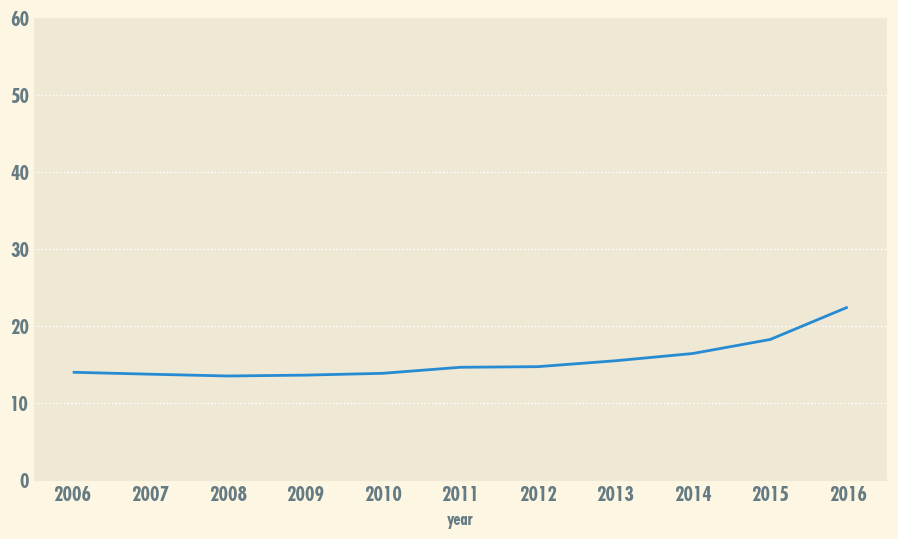

In [42]:
fig, ax = plt.subplots(figsize=(11, 6))

ax = us_death.plot(ax=ax)
ax.xaxis.set_ticks(range(2006,2017, 1))
ax.grid(True, axis='y')
ax.tick_params(length=0)
ax.yaxis.set_ticks(range(0,70, 10))

# plt.savefig('usline.svg')
plt.show()



Index(['county', 'year', 'deaths', 'population', 'deathsper100k', 'state'], dtype='object')

In [13]:
#check for a negative correlation between deathsper100k and year to find negative trending states
df_corr = df_state[['year','deathsper100k', 'state']].groupby('state').corr().reset_index()
df_corr[df_corr['deathsper100k']<0]

,state,level_1,deathsper100k,year
51,MS,year,-0.596944,1.0
53,MT,year,-0.128234,1.0
75,OR,year,-0.127072,1.0
83,SD,year,-1.000000,1.0
101,WY,year,-0.641880,1.0


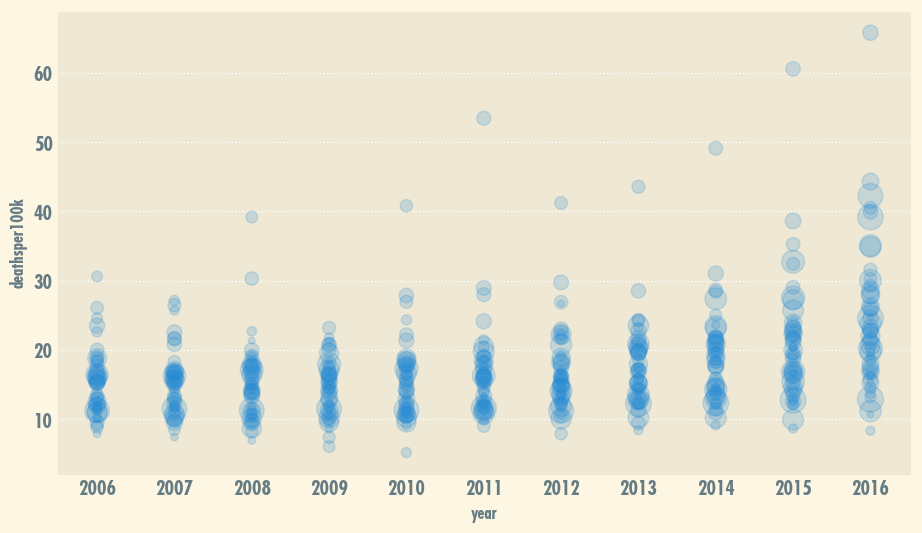

In [45]:
size_by_death = np.sqrt(df_state['deaths'])

fig, ax = plt.subplots()

df_state.plot(kind='scatter', x='year', y='deathsper100k', figsize = (11, 6), ax=ax, alpha=.2, s =5*size_by_death)


ax.xaxis.set_ticks(range(2006,2017, 1))
ax.grid(True, axis='y')
ax.tick_params(length=0)

plt.savefig('scatter.svg')
plt.show()


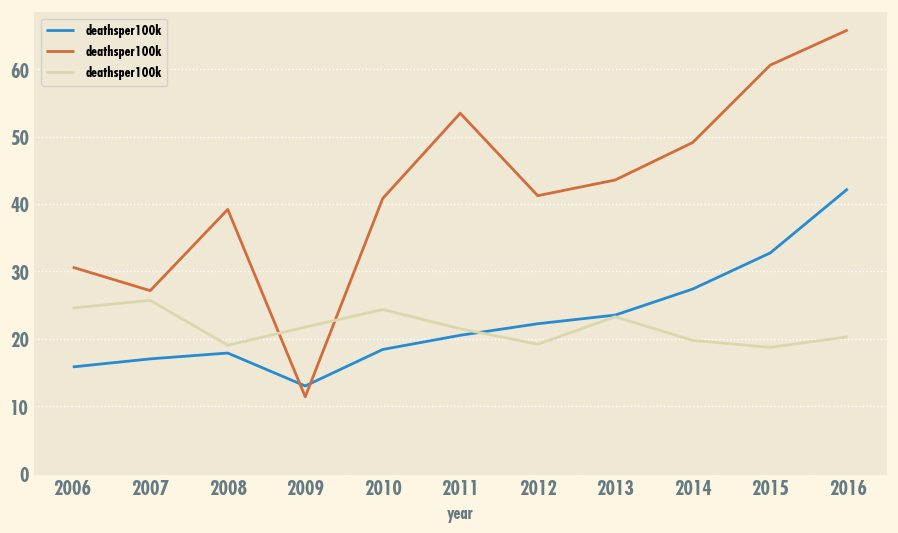

In [47]:
fig, ax = plt.subplots(figsize=(11, 6))

ax = df_oh.plot(x='year',y='deathsper100k', ax=ax)
ax = df_wv.plot(x='year',y='deathsper100k', ax=ax)
# df_ne.plot(x='year',y='deathsper100k', ax=ax)
ax = df_ms.plot(x='year',y='deathsper100k', ax=ax)

ax.xaxis.set_ticks(range(2006,2017, 1))
ax.grid(True, axis='y')
ax.tick_params(length=0)
ax.yaxis.set_ticks(range(0,70, 10))

plt.savefig('line.svg')
plt.show()


In [56]:
us_death

year
2006    13.937496
2007    13.685374
2008    13.455309
2009    13.565248
2010    13.800203
2011    14.585187
2012    14.664482
2013    15.428512
2014    16.373009
2015    18.197270
2016    22.399969
dtype: float64

# Now join in unemployment data from BLS 

In [13]:
#Use glob to get file names
filenames = glob.glob("unemployment/*.xlsx")
filenames

['unemployment/laucnty16.xlsx',
 'unemployment/laucnty11.xlsx',
 'unemployment/laucnty07.xlsx',
 'unemployment/laucnty06.xlsx',
 'unemployment/laucnty10.xlsx',
 'unemployment/laucnty09.xlsx',
 'unemployment/laucnty13.xlsx',
 'unemployment/laucnty12.xlsx',
 'unemployment/laucnty08.xlsx',
 'unemployment/laucnty15.xlsx',
 'unemployment/laucnty14.xlsx']

In [14]:
dataframes = []

for filename in filenames:
    print(filename)
    df_temp = pd.read_excel(filename)
    df_temp['filename'] = filename
    dataframes.append(df_temp)
    
df_unemploy = pd.concat(dataframes, ignore_index=True)

unemployment/laucnty16.xlsx
unemployment/laucnty11.xlsx
unemployment/laucnty07.xlsx
unemployment/laucnty06.xlsx
unemployment/laucnty10.xlsx
unemployment/laucnty09.xlsx
unemployment/laucnty13.xlsx
unemployment/laucnty12.xlsx
unemployment/laucnty08.xlsx
unemployment/laucnty15.xlsx
unemployment/laucnty14.xlsx


In [15]:
df_unemploy.head()

,Code,Code.1,Code.2,County Name/State Abbreviation,Year,Unnamed: 5,Force,Employed,Unemployed,(%),filename
0,CN0100100000000,1,1,"Autauga County, AL",2016,NaN,25918,24593,1325,5.1,unemployment/laucnty16.xlsx
1,CN0100300000000,1,3,"Baldwin County, AL",2016,NaN,90500,85656,4844,5.4,unemployment/laucnty16.xlsx
2,CN0100500000000,1,5,"Barbour County, AL",2016,NaN,8402,7700,702,8.4,unemployment/laucnty16.xlsx
3,CN0100700000000,1,7,"Bibb County, AL",2016,NaN,8607,8050,557,6.5,unemployment/laucnty16.xlsx
4,CN0100900000000,1,9,"Blount County, AL",2016,NaN,24576,23248,1328,5.4,unemployment/laucnty16.xlsx


In [16]:
#Rename coloumns to be better
df_unemploy.rename(columns={'County Name/State Abbreviation': 'county', 'Year': 'year', 'Force': 'labor_force', '(%)': 'unemployment_rate', 'Employed':'employed', 'Unemployed':'unemployed'}, inplace=True)

#Drop useless columns
df_unemploy.drop(['Code','Code.1','Code.2','Unnamed: 5', ], axis=1, inplace=True)

#extract state names from county column, save to new column, states
df_unemploy['state'] = df_unemploy.county.str.extract(', (\w\w)')

#Convert objects to numbers
df_unemploy['labor_force'] = pd.to_numeric(df_unemploy['labor_force'], errors='coerce')
df_unemploy['employed'] = pd.to_numeric(df_unemploy['employed'], errors='coerce')
df_unemploy['unemployed'] = pd.to_numeric(df_unemploy['unemployed'], errors='coerce')
df_unemploy['unemployment_rate'] = pd.to_numeric(df_unemploy['unemployment_rate'], errors='coerce')

# Now join them together

In [17]:
df_complete = df.merge(df_unemploy, left_on=['county', 'year', 'state'], right_on=['county', 'year', 'state'])

In [18]:
df_complete_state = df_complete.groupby(['state', 'year']).sum().reset_index()
df_complete_state.head()

,state,year,deaths,population,deathsper100k,labor_force,employed,unemployed,unemployment_rate
0,AK,2008,20,84079,23.8,41532.0,38372.0,3160.0,7.6
1,AK,2009,20,95238,21.0,46015.0,42756.0,3259.0,7.1
2,AK,2012,24,93925,25.6,43757.0,39968.0,3789.0,8.7
3,AK,2016,25,104365,24.0,47520.0,43580.0,3940.0,8.3
4,AL,2006,209,1587154,65.0,764369.0,735919.0,28450.0,17.4


In [19]:
df_complete_state['unemployment_rate'] = round(df_complete_state['unemployed']/df_complete_state['labor_force']*100, 2)

In [20]:
df_complete_state.head()

,state,year,deaths,population,deathsper100k,labor_force,employed,unemployed,unemployment_rate
0,AK,2008,20,84079,23.8,41532.0,38372.0,3160.0,7.61
1,AK,2009,20,95238,21.0,46015.0,42756.0,3259.0,7.08
2,AK,2012,24,93925,25.6,43757.0,39968.0,3789.0,8.66
3,AK,2016,25,104365,24.0,47520.0,43580.0,3940.0,8.29
4,AL,2006,209,1587154,65.0,764369.0,735919.0,28450.0,3.72


In [ ]:

df_complete_total = df_complete.groupby(['year']).sum().reset_index()
df_complete_total.head()
df_complete_total['unemployment_rate'] = round(df_complete_total['unemployed']/df_complete_total['labor_force']*100, 2)
df_complete_total = df_complete_total.drop('deathsper100k', axis=1)

In [42]:
# fig, ax = plt.subplots()

# df_complete_total.plot(kind='bar', x='year',y='unemployment_rate', figsize=(15,10), ax=ax)

# plt.show()